# Credit Card dataset information

Download this dataset from Kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata) 

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [3]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline 
#need the % in order to see the plots in the jupiter notebook

In [4]:
# read file into dataframe

df = pd.read_csv("datasets/credit_card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df2 = df.copy()
df2.dropna(inplace=True)

In [10]:
df2.isnull().sum()
#making sure no null values

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
dupes = df2.duplicated()
df2.loc[dupes]

#no duplicates

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [12]:
# remove CustomerID column
df2.drop('CUST_ID', axis=1, inplace=True)

In [13]:
df2.columns
#making sure cust_id col removed

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
df2.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [15]:
# create dataframe with the columns of interest

ccdf = df2[['CREDIT_LIMIT','BALANCE','PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY']]
ccdf.head()

,CREDIT_LIMIT,BALANCE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,1000.0,40.900749,0.166667,0.083333
1,7000.0,3202.467416,0.000000,0.000000
2,7500.0,2495.148862,1.000000,0.000000
4,1200.0,817.714335,0.083333,0.000000
5,1800.0,1809.828751,0.666667,0.583333


In [71]:
# rename column headers
colheader = {'CREDIT_LIMIT': 'Credit Limit',
             'BALANCE': 'Balance', 
             'PURCHASES_FREQUENCY':'Purchase Frequency',
            'PURCHASES_INSTALLMENTS_FREQUENCY': 'Installment Frequency'}

ccdf.rename(columns = colheader, inplace = True)

C:\Users\Davina\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
ccdf.head()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency
0,1000.0,40.900749,0.166667,0.083333
1,7000.0,3202.467416,0.000000,0.000000
2,7500.0,2495.148862,1.000000,0.000000
4,1200.0,817.714335,0.083333,0.000000
5,1800.0,1809.828751,0.666667,0.583333


In [18]:
ccdf.describe()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency
count,8636.000000,8636.000000,8636.000000,8636.000000
mean,4522.091030,1601.224893,0.496000,0.368820
std,3659.240379,2095.571300,0.401273,0.398093
min,50.000000,0.000000,0.000000,0.000000
25%,1600.000000,148.095189,0.083333,0.000000
50%,3000.000000,916.855459,0.500000,0.166667
75%,6500.000000,2105.195853,0.916667,0.750000
max,30000.000000,19043.138560,1.000000,1.000000


C:\Users\Davina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit Limit', ylabel='count'>

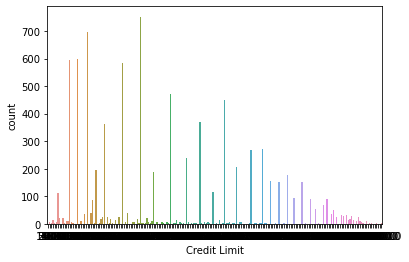

In [18]:
sns.countplot(ccdf['Credit Limit'])

#need to make some groupings to make this plot provide useful data

In [20]:
ccdf2 = ccdf.copy()

#create a function for grouping for credit limit

def credit_limit_groups(limit):
    group = ""
    if limit < 5000:
        group = 'under $5K'
    elif limit < 10_000:
        group = '$5-10K'
    elif limit < 15_000:
        group = '$15-20K'
    else:
        group = '$20K+'
        
    return group


ccdf2['Credit_Limit_Groups'] = ccdf2['Credit Limit'].apply(credit_limit_groups) 

ccdf2.head()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,Credit_Limit_Groups
0,1000.0,40.900749,0.166667,0.083333,under $5K
1,7000.0,3202.467416,0.000000,0.000000,$5-10K
2,7500.0,2495.148862,1.000000,0.000000,$5-10K
4,1200.0,817.714335,0.083333,0.000000,under $5K
5,1800.0,1809.828751,0.666667,0.583333,under $5K


C:\Users\Davina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Limit_Groups', ylabel='count'>

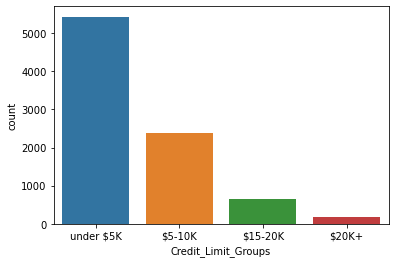

In [21]:
sns.countplot(ccdf2['Credit_Limit_Groups'])

#most credit card limits are less than $5k

In [22]:
#create a function for grouping for balance

def balance_groups(bal):
    group = ""
    if bal < 2000:
        group = 'under $2K'
    elif bal < 5_000:
        group = '$2-5K'
    else:
        group = '$5K+'
        
    return group

ccdf2['Balance_Groups'] = ccdf2['Balance'].apply(balance_groups)

ccdf2.head()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,Credit_Limit_Groups,Balance_Groups
0,1000.0,40.900749,0.166667,0.083333,under $5K,under $2K
1,7000.0,3202.467416,0.000000,0.000000,$5-10K,$2-5K
2,7500.0,2495.148862,1.000000,0.000000,$5-10K,$2-5K
4,1200.0,817.714335,0.083333,0.000000,under $5K,under $2K
5,1800.0,1809.828751,0.666667,0.583333,under $5K,under $2K


C:\Users\Davina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance_Groups', ylabel='count'>

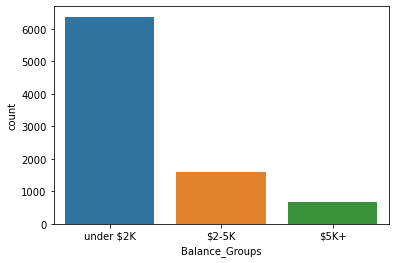

In [23]:
sns.countplot(ccdf2['Balance_Groups'])

#most credit card balances are less than $2k

In [25]:
def freq_groups(freq):
    group = ""
    if freq < 0.3:
        group = 'Low'
    elif freq < 0.5:
        group = 'Moderate'
    elif freq < 0.7:
        group = 'High'
    else:
        group = 'Very High'
        
    return group


ccdf2['Purchase_Frequency_Groups'] = ccdf2['Purchase Frequency'].apply(freq_groups) 

ccdf2['Installment_Frequency_Groups'] = ccdf2['Installment Frequency'].apply(freq_groups) 


ccdf2.head()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,Credit_Limit_Groups,Balance_Groups,Purchase_Frequency_Groups,Installment_Frequency_Groups
0,1000.0,40.900749,0.166667,0.083333,under $5K,under $2K,Low,Low
1,7000.0,3202.467416,0.000000,0.000000,$5-10K,$2-5K,Low,Low
2,7500.0,2495.148862,1.000000,0.000000,$5-10K,$2-5K,Very High,Low
4,1200.0,817.714335,0.083333,0.000000,under $5K,under $2K,Low,Low
5,1800.0,1809.828751,0.666667,0.583333,under $5K,under $2K,High,High


C:\Users\Davina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase_Frequency_Groups', ylabel='count'>

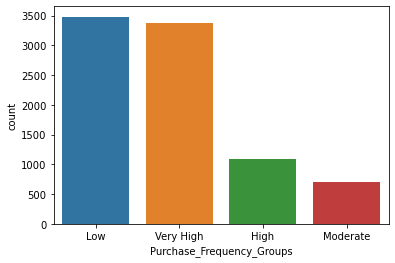

In [26]:
sns.countplot(ccdf2['Purchase_Frequency_Groups'])

#these credit card customers with low purchase frequency is basically same as very frequent credit card purchasers

C:\Users\Davina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installment_Frequency_Groups', ylabel='count'>

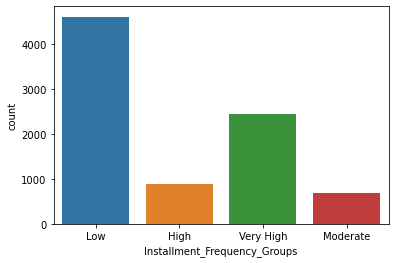

In [73]:
sns.countplot(ccdf2['Installment_Frequency_Groups'])

# most credit customers in sample have balances have a low rate of installment charges

In [56]:
# mean average purchase frequency by balance group
# the highest average purchase rate is for credit card customers with balances less than $2k

pd.pivot_table(data=ccdf2, index=['Balance_Groups'], values='Purchase Frequency', aggfunc=np.mean)

,Purchase Frequency
Balance_Groups,
$2-5K,0.437187
$5K+,0.452271
under $2K,0.515250


In [74]:
bal = ccdf2['Balance'].sum()
lim = ccdf2['Credit Limit'].sum()

#credit limit utilization
cc_util = bal / lim
print(f"{cc_util:.2}")
#Average 35% credit utilization

0.35


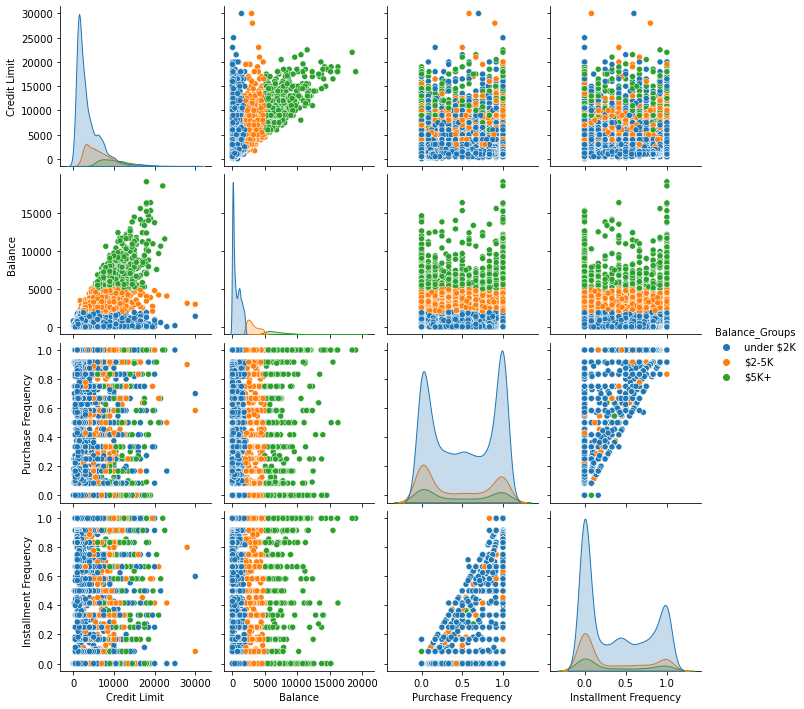

In [67]:
# compare all numerical features by baLnce group
sns.pairplot(data=ccdf2, hue="Balance_Groups")

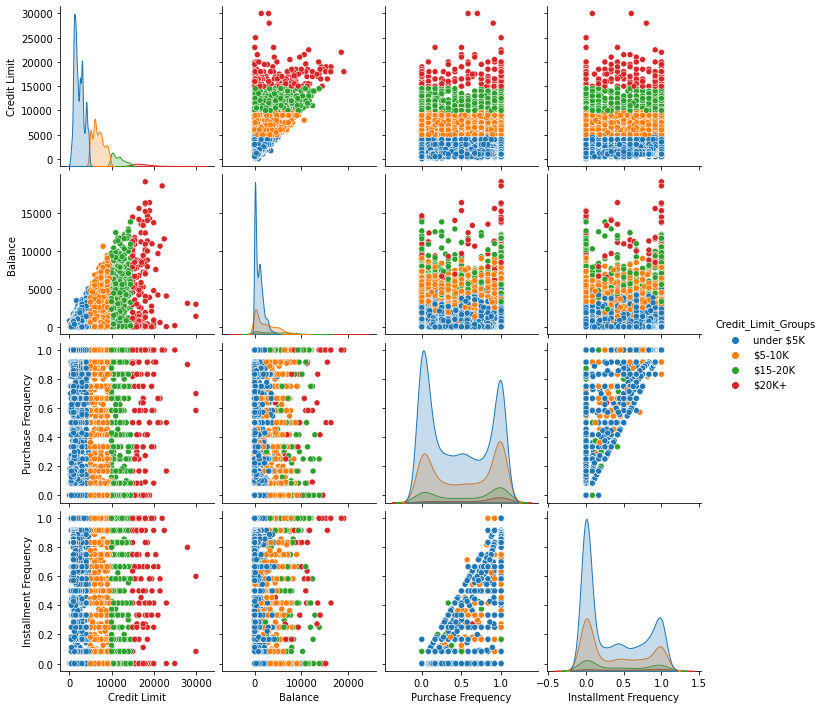

In [69]:
# compare all numerical features by credit limit groups
sns.pairplot(data=ccdf2, hue="Credit_Limit_Groups")

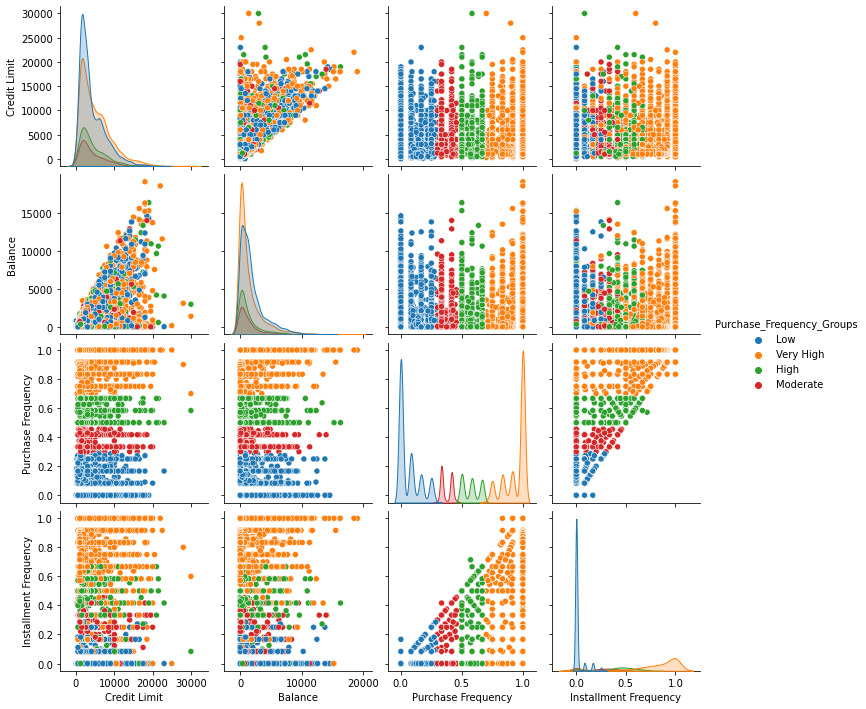

In [28]:
# compare all numerical features by baLnce group
sns.pairplot(data=ccdf2, hue="Purchase_Frequency_Groups")

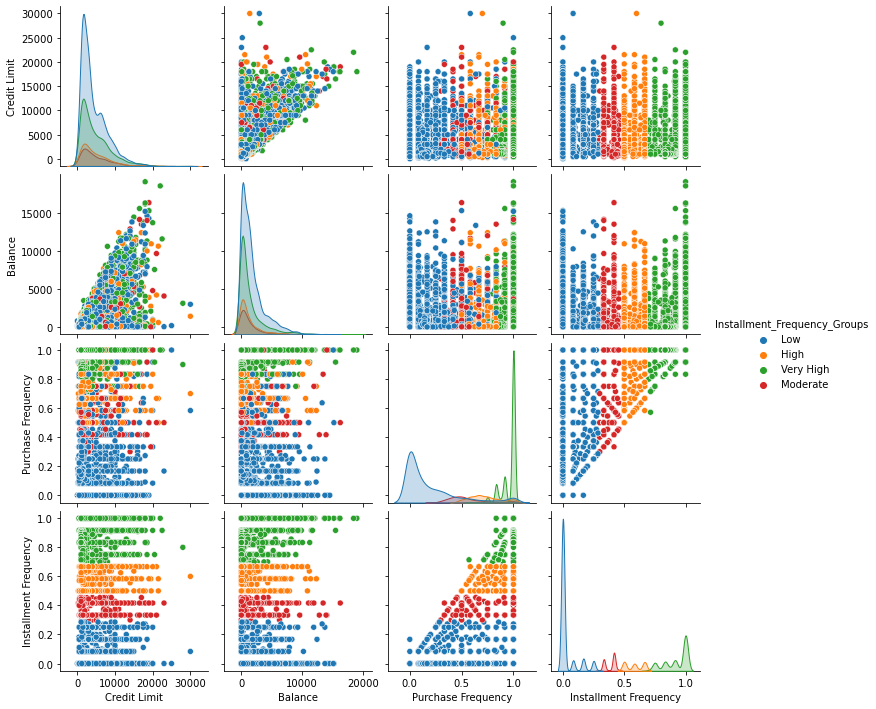

In [29]:
# compare all numerical features by baLnce group
sns.pairplot(data=ccdf2, hue="Installment_Frequency_Groups")

## K-Means

In [34]:
# dataframe that will be used in algorithm
X = ccdf2[['Balance', 'Credit Limit','Purchase Frequency']]
X.head()

,Balance,Credit Limit,Purchase Frequency
0,40.900749,1000.0,0.166667
1,3202.467416,7000.0,0.000000
2,2495.148862,7500.0,1.000000
4,817.714335,1200.0,0.083333
5,1809.828751,1800.0,0.666667


In [35]:
# initialize KMeans to create 5 clusters | 3 - 5 is a good # as standard practice
kmeans = KMeans(n_clusters=5)

In [36]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(n_clusters=5)

In [37]:
len(ccdf2)

8636

In [38]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(0=Age, 1=Income, 2=Score)
kmeans.cluster_centers_

array([[1.24774046e+03, 1.17331633e+04, 6.43734716e-01],
       [8.39610831e+02, 1.92591444e+03, 4.49364824e-01],
       [4.47905514e+03, 7.00181905e+03, 4.25421343e-01],
       [8.25980972e+03, 1.34371758e+04, 5.30181499e-01],
       [8.15568551e+02, 5.60579366e+03, 5.92389536e-01]])

In [39]:
# create column in original dataframe with cluster group number
ccdf2['cluster'] = kmeans.labels_ #assign labels to cluster
ccdf2.head()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,Credit_Limit_Groups,Balance_Groups,Purchase_Frequency_Groups,Installment_Frequency_Groups,cluster
0,1000.0,40.900749,0.166667,0.083333,under $5K,under $2K,Low,Low,1
1,7000.0,3202.467416,0.000000,0.000000,$5-10K,$2-5K,Low,Low,2
2,7500.0,2495.148862,1.000000,0.000000,$5-10K,$2-5K,Very High,Low,2
4,1200.0,817.714335,0.083333,0.000000,under $5K,under $2K,Low,Low,1
5,1800.0,1809.828751,0.666667,0.583333,under $5K,under $2K,High,High,1


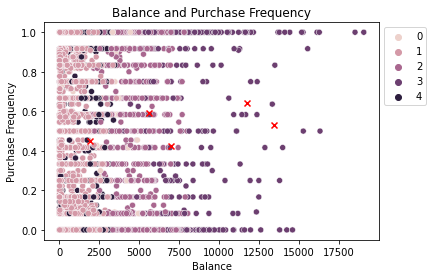

In [41]:
# compare "Balance" and "Purchase Frequency"
sns.scatterplot(data=ccdf2, x='Balance', y='Purchase Frequency', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Balance and Purchase Frequency")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [45]:
# select a cluster from dataframe
cluster = ccdf2.loc[ccdf2['cluster'] == 0]
cluster.head()

#rename each cluster to correspond with cluster = 0 to examine each futher

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,Credit_Limit_Groups,Balance_Groups,Purchase_Frequency_Groups,Installment_Frequency_Groups,cluster
6,13500.0,627.260806,1.000000,1.000000,$15-20K,under $2K,Very High,Very High,0
9,11000.0,152.225975,0.166667,0.000000,$15-20K,under $2K,Low,Low,0
18,13000.0,1989.072228,0.666667,0.583333,$15-20K,under $2K,High,High,0
34,11000.0,3517.101616,1.000000,1.000000,$15-20K,$2-5K,Very High,Very High,0
76,11000.0,1727.638449,1.000000,0.000000,$15-20K,under $2K,Very High,Low,0


In [46]:
# number of customers in this cluster
len(cluster)

587

In [47]:
# descriptive statistics for this cluster
cluster.describe()

,Credit Limit,Balance,Purchase Frequency,Installment Frequency,cluster
count,587.000000,587.000000,587.000000,587.000000,587.0
mean,11737.819421,1245.845494,0.644831,0.435785,0.0
std,2727.595801,1372.097557,0.383356,0.402446,0.0
min,8800.000000,0.488050,0.000000,0.000000,0.0
25%,10000.000000,148.668981,0.250000,0.000000,0.0
50%,10950.000000,541.240795,0.833333,0.416667,0.0
75%,13000.000000,2253.476598,1.000000,0.833333,0.0
max,25000.000000,4968.771623,1.000000,1.000000,0.0


In [78]:
# sort the cluster numbers from min(0) to max(4)
# pretty way to show cluster data ... instead of dataframe above

sorted_clusters = sorted(ccdf2['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Balance Ranges\n")
for cluster_num in sorted_clusters:
    small_df = ccdf2.loc[ccdf2['cluster'] == cluster_num]
    min_balance = small_df['Balance'].min()
    max_balance = small_df['Balance'].max()
    avg_freq = small_df['Purchase Frequency'].mean()
    
    print(f"Cluster {cluster_num}: ${min_balance} - {max_balance}K | avg purchase freq: {avg_freq:.2}")

Cluster Balance Ranges

Cluster 0: $0.48805 - 4968.771623K | avg purchase freq: 0.64
Cluster 1: $0.0 - 3676.0703240000003K | avg purchase freq: 0.45
Cluster 2: $1848.248809 - 8435.192572K | avg purchase freq: 0.42
Cluster 3: $1409.256223 - 19043.13856K | avg purchase freq: 0.53
Cluster 4: $0.0 - 3515.039029K | avg purchase freq: 0.59


In [65]:
#new credit card cust

# new customer with balance=$4k, credit limit=$15k, and purchase frequency=75%
customer = [5_000, 15_000, .75] #has to be numerical values

customer_group = kmeans.predict([customer])

print(f"Cluster assignment: {customer_group}")

Cluster assignment: [3]


In [66]:
print(5_000 / 15_000)

0.3333333333333333


## Conclusion

This customer is assigned to the group of credit card customers that have a high balance (at sample max balance) and credit limit (75% std) and frequently make credit card purchases. Although, their credit utilization (balance / limit) is near the average of 35% for this sample.

This customer is a frequent credit card user so a rewards program is unnecessary. 